In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 1000

2024-01-25 23:26:34.057196: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-25 23:26:34.103374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-25 23:26:34.741858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('IMDB Dataset.csv', sep=",")

In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from tqdm import tqdm
from nltk import sent_tokenize,word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     tykfik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter-
[nltk_data]     tykfik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter-
[nltk_data]     tykfik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jupyter-
[nltk_data]     tykfik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
main = []

# Storing all punctuations using RE library like !;,"% etc
re_puncs = re.compile('[%s]' % re.escape(string.punctuation))
# Storing all stop words like a, an, the, when, there, this etc
stop_word  = set(stopwords.words('english'))
stop_word.add("im")
# print(stop_word)
# Making Lemmatizing object
lem = WordNetLemmatizer()
# Using Porter Stemmer
p_stem = PorterStemmer()

# Traversing whole dataset
for i in tqdm(range(len(df['review']))):
    # Tokenization
    tokens = word_tokenize(str(df['review'][i]))
    # Converting all characters to lower case
    tokens = [w.lower() for w in tokens]
    # Remove all punctuations from sentenses
    tokens = [re_puncs.sub('', w) for w in tokens]
    # Checking all words is alphabets or not
    tokens = [i for i in tokens if i.isalpha()]
    # Removing all stop words from the sentenses
    tokens = [w for w in tokens if w not in stop_word]
    # Doing Lemmatizing of words
    tokens = [lem.lemmatize(w) for w in tokens]
    # Stemming process
    tokens = [p_stem.stem(w) for w in tokens]
    # Finally convert to string
    r = ' '.join(tokens)
    # Storing the final string into main list
    main.append(r)
    
#https://www.kaggle.com/code/tanujdhiman/twitter-sentiment-analysis

100%|██████████| 50000/50000 [03:10<00:00, 262.51it/s]


In [5]:
df['translated'] = main

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 50000, oov_token = "<00V>")
tokenizer.fit_on_texts(df['translated'])

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['sentiment_cat']=label_encoder.fit_transform(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(df["translated"], df['sentiment_cat'], train_size = 0.8, random_state=1)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train, maxlen=50, padding="post")
X_test_pad = pad_sequences(X_test, maxlen=50, padding="post")


In [21]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [23]:
df['sentiment_cat'].value_counts()

sentiment_cat
1    25000
0    25000
Name: count, dtype: int64

In [8]:
#Porównaj ze sobą modele wykorzystujące SimpleRNN, GRU i LSTM

In [9]:
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Embedding, Flatten

In [10]:
n_words = 50000
max_words = 50

In [11]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_gru.add(Flatten())
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.summary()
model_gru.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            800000    
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                51264     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 851,329
Trainable params: 851,329
Non-trainable params: 0
_________________________________________________________________


2024-01-25 23:29:54.023134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-25 23:29:54.023187: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2024-01-25 23:29:54.023199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2024-01-25 23:29:54.023393: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2024-01-25 23:29:54.023429: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2024-01-25 23:29:54.023438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


In [12]:
history_gru = model_gru.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.4030 - accuracy: 0.8131 - val_loss: 0.3354 - val_accuracy: 0.8528
Epoch 2/1000
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1928 - accuracy: 0.9270 - val_loss: 0.3945 - val_accuracy: 0.8355
Epoch 3/1000
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.6094 - val_accuracy: 0.8245
Epoch 4/1000
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.7974 - val_accuracy: 0.8220
Epoch 5/1000
1250/1250 [==============================] - 8s 6ms/step - loss: 6.1287e-04 - accuracy: 1.0000 - val_loss: 0.8798 - val_accuracy: 0.8257
Epoch 6/1000
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2875e-04 - accuracy: 1.0000 - val_loss: 0.9324 - val_accuracy: 0.8294


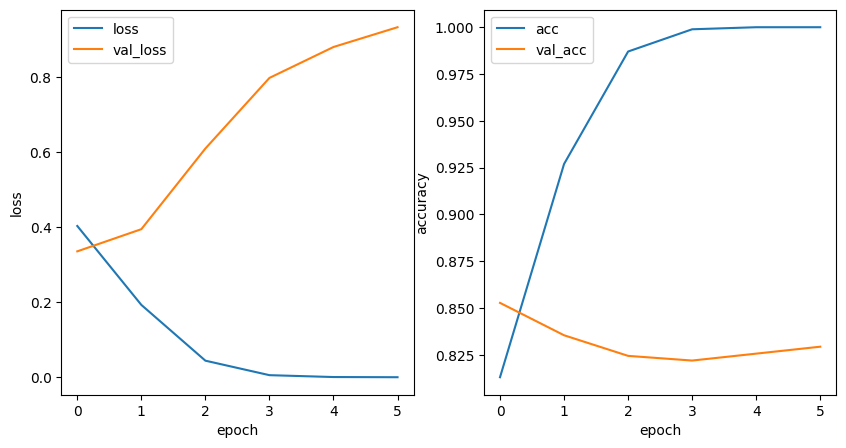

In [13]:
hist_gru = pd.DataFrame(history_gru.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_gru.loss, label = "loss")
plt.plot(hist_gru.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_gru.accuracy, label = "acc")
plt.plot(hist_gru.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [14]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_lstm.add(LSTM(32))
model_lstm.add(Flatten())
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()
model_lstm.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            800000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 808,449
Trainable params: 808,449
Non-trainable params: 0
_________________________________________________________________


2024-01-25 23:30:44.318180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-25 23:30:44.320003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-25 23:30:44.321004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [15]:
history_lstm = model_lstm.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000


2024-01-25 23:30:44.580206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-25 23:30:44.581791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-25 23:30:44.582813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1250/1250 [==============================] - ETA: 0s - loss: 0.3929 - accuracy: 0.8201

2024-01-25 23:31:16.906585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-25 23:31:16.907718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-25 23:31:16.909096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1250/1250 [==============================] - 36s 27ms/step - loss: 0.3929 - accuracy: 0.8201 - val_loss: 0.3398 - val_accuracy: 0.8513
Epoch 2/1000
1250/1250 [==============================] - 33s 27ms/step - loss: 0.2585 - accuracy: 0.8959 - val_loss: 0.3535 - val_accuracy: 0.8479
Epoch 3/1000
1250/1250 [==============================] - 31s 25ms/step - loss: 0.1937 - accuracy: 0.9257 - val_loss: 0.3995 - val_accuracy: 0.8425
Epoch 4/1000
1250/1250 [==============================] - 31s 25ms/step - loss: 0.1398 - accuracy: 0.9475 - val_loss: 0.4515 - val_accuracy: 0.8276
Epoch 5/1000
1250/1250 [==============================] - 31s 25ms/step - loss: 0.0959 - accuracy: 0.9648 - val_loss: 0.4967 - val_accuracy: 0.8280
Epoch 6/1000
1250/1250 [==============================] - 31s 25ms/step - loss: 0.0662 - accuracy: 0.9768 - val_loss: 0.6631 - val_accuracy: 0.8252


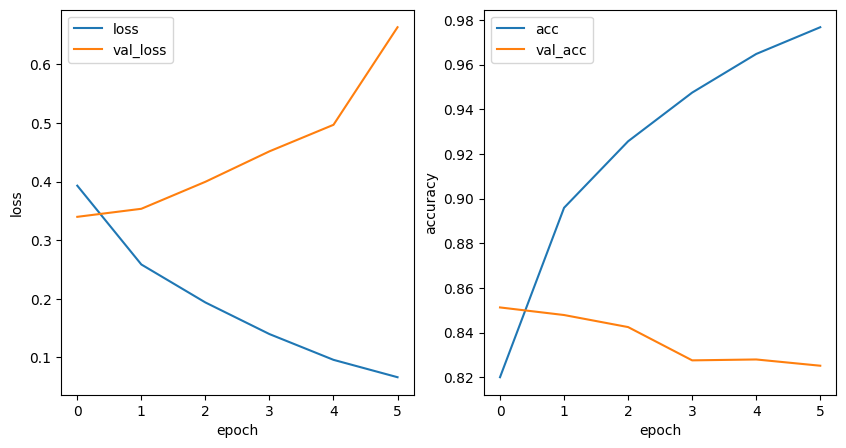

In [16]:
hist_lstm = pd.DataFrame(history_lstm.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_lstm.loss, label = "loss")
plt.plot(hist_lstm.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_lstm.accuracy, label = "acc")
plt.plot(hist_lstm.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [17]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Flatten())
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.summary()
model_rnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            800000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 803,745
Trainable params: 803,745
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_rnn = model_rnn.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
1250/1250 [==============================] - 23s 18ms/step - loss: 0.4577 - accuracy: 0.7732 - val_loss: 0.3767 - val_accuracy: 0.8417
Epoch 2/1000
1250/1250 [==============================] - 22s 17ms/step - loss: 0.2795 - accuracy: 0.8887 - val_loss: 0.3769 - val_accuracy: 0.8373
Epoch 3/1000
1250/1250 [==============================] - 22s 17ms/step - loss: 0.1861 - accuracy: 0.9317 - val_loss: 0.4071 - val_accuracy: 0.8325
Epoch 4/1000
1250/1250 [==============================] - 22s 17ms/step - loss: 0.0998 - accuracy: 0.9654 - val_loss: 0.5764 - val_accuracy: 0.8350
Epoch 5/1000
1250/1250 [==============================] - 21s 17ms/step - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.6764 - val_accuracy: 0.8227
Epoch 6/1000
1250/1250 [==============================] - 22s 17ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.8126 - val_accuracy: 0.8292


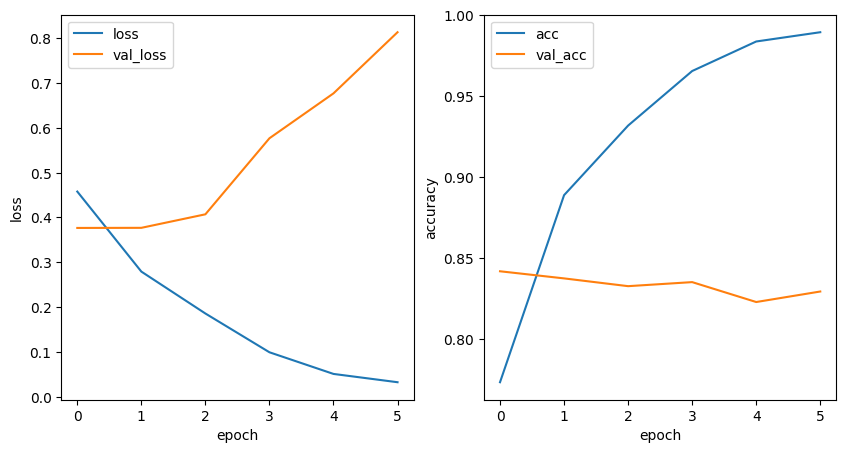

In [19]:
hist_rnn = pd.DataFrame(history_rnn.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_rnn.loss, label = "loss")
plt.plot(hist_rnn.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_rnn.accuracy, label = "acc")
plt.plot(hist_rnn.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()